In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from datetime import timedelta
new_df = pd.read_csv('H_new_df.csv') #1

In [2]:
#pd.set_option('display.max_rows', None)


#pd.set_option('display.max_rows', 10)

In [3]:
#new_df.groupby('Description').values()

In [4]:
new_df.head(10)


Unnamed: 0  InvoiceNo StockCode                          Description  \
0           0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1           1     536365     71053                  WHITE METAL LANTERN   
2           2     536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3           3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4           4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
5           5     536365     22752         SET 7 BABUSHKA NESTING BOXES   
6           6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER   
7           7     536366     22633               HAND WARMER UNION JACK   
8           8     536366     22632            HAND WARMER RED RETROSPOT   
9           9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT   

   Quantity          InvoiceDate  UnitPrice  CustomerID         Country  \
0         6  2010-12-01 08:26:00       2.55       17850  United Kingdom   
1         6  2010-12-01 08:26:00       3.39       17850  United Kingdom   
2         8  2010-12-01 08:26:00       2.75       17850  United Kingdom   
3         6  2010-12-01 08:26:00       3.39       17850  United Kingdom   
4         6  2010-12-01 08:26:00       3.39       17850  United Kingdom   
5         2  2010-12-01 08:26:00       7.65       17850  United Kingdom   
6         6  2010-12-01 08:26:00       4.25       17850  United Kingdom   
7         6  2010-12-01 08:28:00       1.85       17850  United Kingdom   
8         6  2010-12-01 08:28:00       1.85       17850  United Kingdom   
9        32  2010-12-01 08:34:00       1.69       13047  United Kingdom   

   amount  
0   15.30  
1   20.34  
2   22.00  
3   20.34  
4   20.34  
5   15.30  
6   25.50  
7   11.10  
8   11.10  
9   54.08

In [5]:
new_df.describe()

Unnamed: 0      InvoiceNo       Quantity      UnitPrice  \
count  397884.00000  397884.000000  397884.000000  397884.000000   
mean   198941.50000  560616.934451      12.988238       3.116488   
std    114859.36159   13106.117773     179.331775      22.097877   
min         0.00000  536365.000000       1.000000       0.001000   
25%     99470.75000  549234.000000       2.000000       1.250000   
50%    198941.50000  561893.000000       6.000000       1.950000   
75%    298412.25000  572090.000000      12.000000       3.750000   
max    397883.00000  581587.000000   80995.000000    8142.750000   

          CustomerID         amount  
count  397884.000000  397884.000000  
mean    15294.423453      22.397000  
std      1713.141560     309.071041  
min     12346.000000       0.001000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000

In [6]:

new_df['total_price'] = new_df['Quantity']*new_df['UnitPrice']
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])
reference_date = max(new_df['InvoiceDate']) + timedelta(days=1)
#2
history_df = new_df.groupby(['CustomerID']).agg({'InvoiceDate':lambda x: (reference_date - x.max()).days, 'InvoiceNo':'count','total_price':'sum'})
history_df.columns = ['Recency','Frequency','Monetary']
history_df.head(10)



Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2        182   4310.00
12348            75         31   1797.24
12349            19         73   1757.55
12350           310         17    334.40
12352            36         85   2506.04
12353           204          4     89.00
12354           232         58   1079.40
12355           214         13    459.40
12356            23         59   2811.43

In [7]:
#3 To account for outliers, applied log function
import math
history_df = history_df.agg({'Recency':lambda x : x.apply(math.log),
               'Frequency':lambda x : x.apply(math.log),
               'Monetary':lambda x : x.apply(math.log)})
#4 plot vs amt

In [8]:
#history_df['RFM_log_sum'] = history_df['Recency'] + history_df['Frequency'] + history_df['Monetary']

In [9]:
history_df.head()

Recency  Frequency   Monetary
CustomerID                                
12346       5.786897   0.000000  11.253942
12347       0.693147   5.204007   8.368693
12348       4.317488   3.433987   7.494007
12349       2.944439   4.290459   7.471676
12350       5.736572   2.833213   5.812338

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

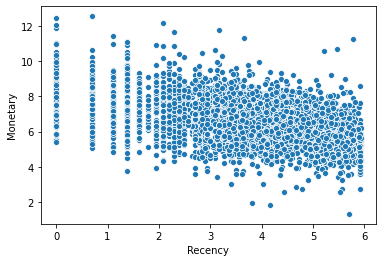

In [10]:

import seaborn as sns
sns.scatterplot(history_df['Recency'], history_df['Monetary'])



<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

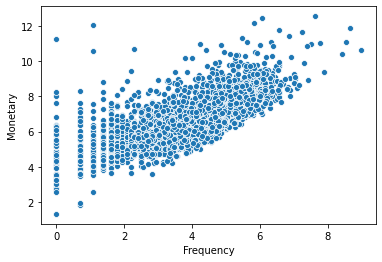

In [11]:
sns.scatterplot(history_df['Frequency'], history_df['Monetary'])

<AxesSubplot:xlabel='Frequency', ylabel='Recency'>

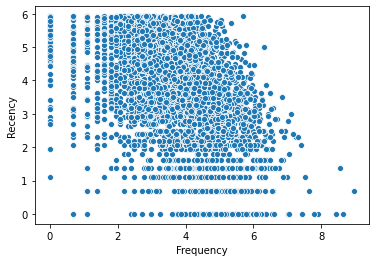

In [12]:
sns.scatterplot(history_df['Frequency'], history_df['Recency'])

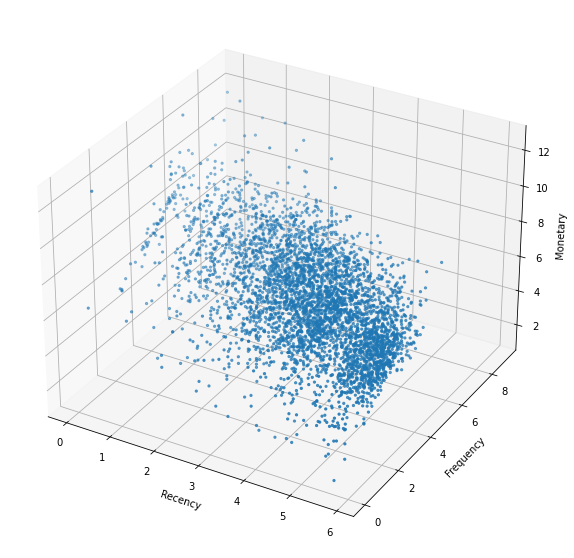

In [13]:
#4

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

r = history_df.Recency
f = history_df.Frequency
m = history_df.Monetary
ax.scatter(r, f, m, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [14]:
RFM_final_df = history_df

In [15]:
RFM_final_df

Recency  Frequency   Monetary
CustomerID                                
12346       5.786897   0.000000  11.253942
12347       0.693147   5.204007   8.368693
12348       4.317488   3.433987   7.494007
12349       2.944439   4.290459   7.471676
12350       5.736572   2.833213   5.812338
...              ...        ...        ...
18280       5.627621   2.302585   5.196285
18281       5.198497   1.945910   4.392224
18282       2.079442   2.484907   5.182064
18283       1.386294   6.628041   7.647252
18287       3.761200   4.248495   7.516041

[4338 rows x 3 columns]

In [16]:
#RFM_final_df.boxplot(column=['Recency','Frequency','Monetary'], by=['RFM_log_sum'],figsize=(15,12))

### Using Kmeans on RFM values to determine best clusters

In [17]:
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

feature_vector = ['Recency','Frequency', 'Monetary']
X_subset = RFM_final_df[feature_vector]
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)


from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

sse,db,slc = {}, {}, {}
for k in range(2, 20):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=10,random_state=10).fit(X_scaled)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X_scaled,clusters)
    slc[k] = silhouette_score(X_scaled,clusters)

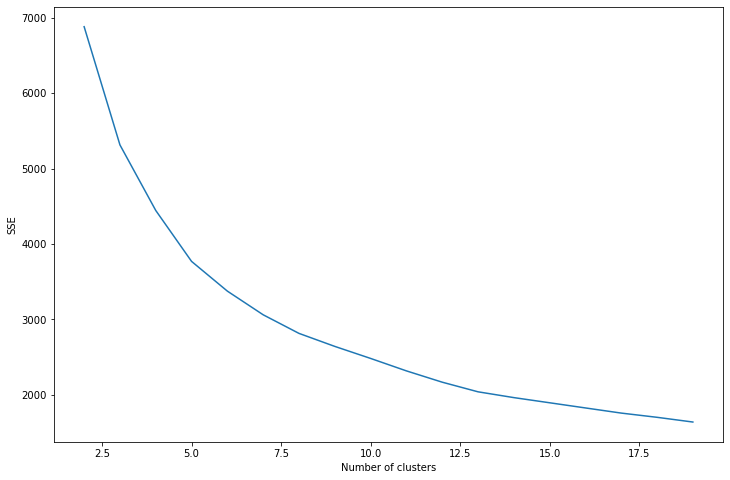

7

In [18]:
#Elbow method
plt.figure(figsize = (12, 8) )
plt.plot(list(sse.keys() ), list(sse.values() ) )
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()
from kneed import *
kl = KneeLocator(range(2,20), list(sse.values()), curve = 'convex', direction = 'decreasing')
kl.elbow

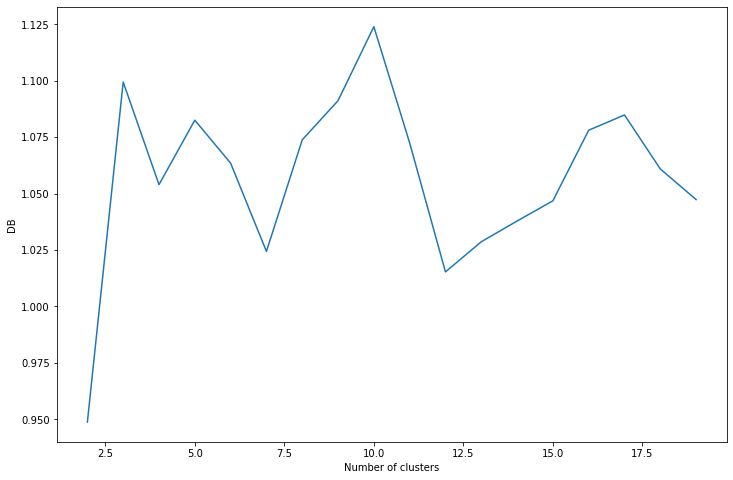

2


In [19]:
# DB
plt.figure(figsize = (12, 8) )
plt.plot(list(db.keys() ), list(db.values() ) )
plt.xlabel("Number of clusters")
plt.ylabel("DB")
plt.show()
print(list(db.keys()) [list(db.values()).index(min(db.values()))]) 

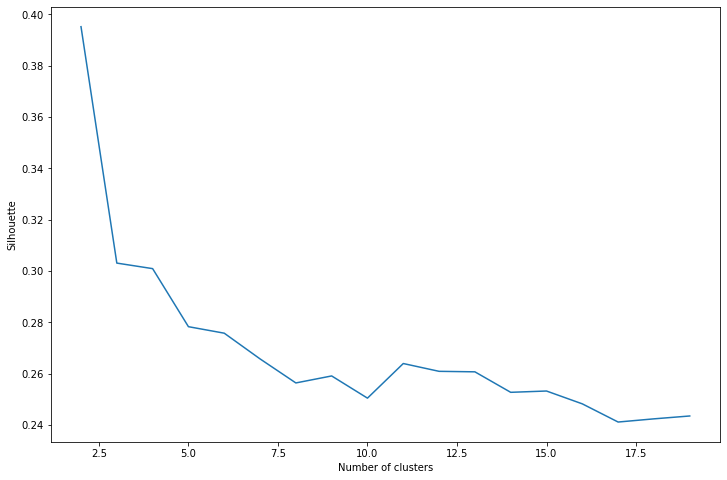

2


In [20]:
# Silhouette
plt.figure(figsize = (12, 8) )
plt.plot(list(slc.keys() ), list(slc.values() ) )
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette")
plt.show()
print(list(slc.keys()) [list(slc.values()).index(max(slc.values()))])

For n_clusters = 2 The average silhouette_score is : 0.3952253031244901
For n_clusters = 3 The average silhouette_score is : 0.30313313177410495
For n_clusters = 4 The average silhouette_score is : 0.3020417883661806
For n_clusters = 5 The average silhouette_score is : 0.2778217616945531
For n_clusters = 6 The average silhouette_score is : 0.27655060366929796
For n_clusters = 7 The average silhouette_score is : 0.2630359414042273
For n_clusters = 8 The average silhouette_score is : 0.26273551315568383
For n_clusters = 9 The average silhouette_score is : 0.25913114457062775
For n_clusters = 10 The average silhouette_score is : 0.2655411235831407
For n_clusters = 11 The average silhouette_score is : 0.2649984533582988
For n_clusters = 12 The average silhouette_score is : 0.2632156830781995
For n_clusters = 13 The average silhouette_score is : 0.2618926202705995
For n_clusters = 14 The average silhouette_score is : 0.2525654788298963
For n_clusters = 15 The average silhouette_score is : 0

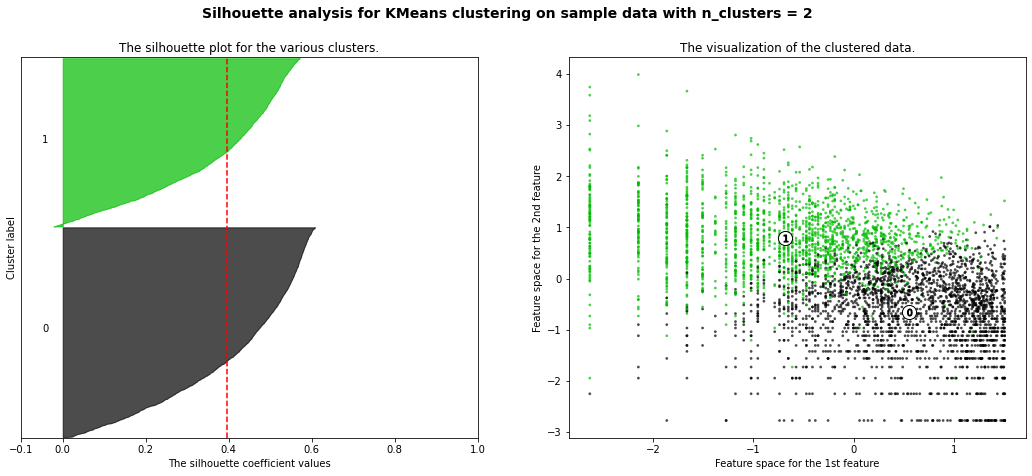

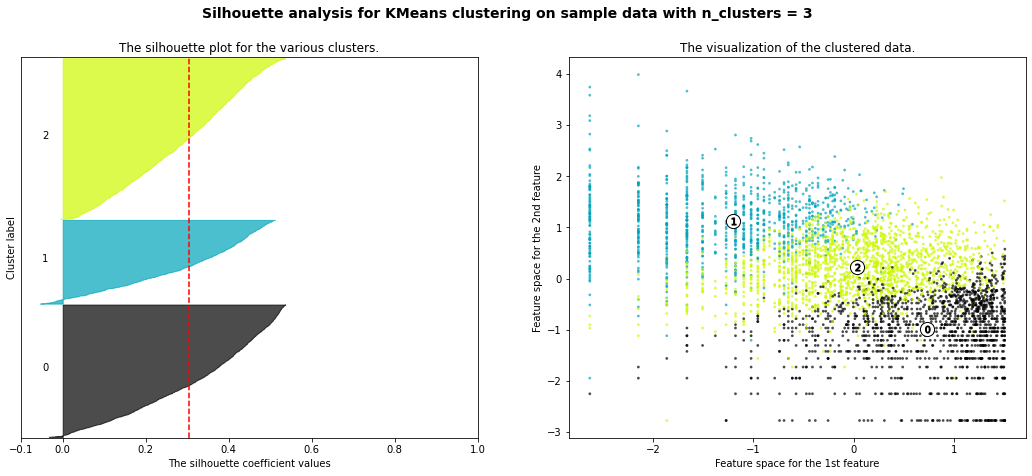

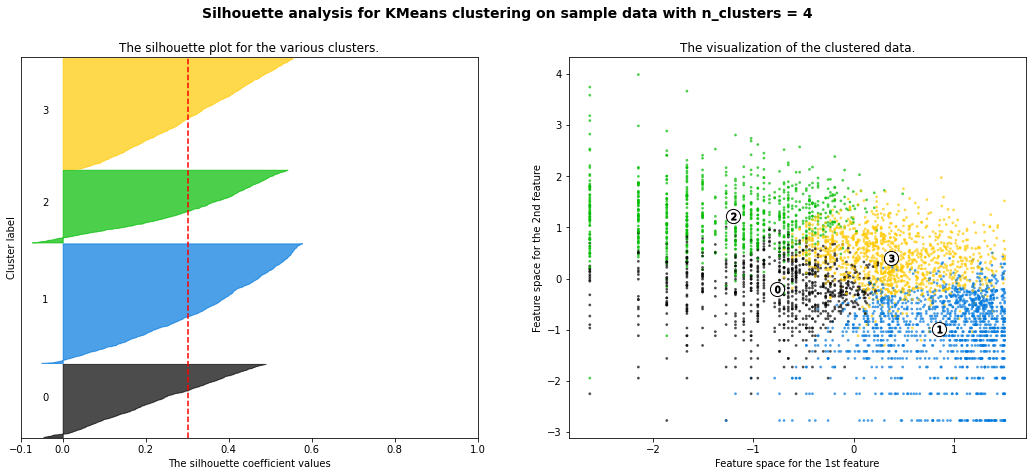

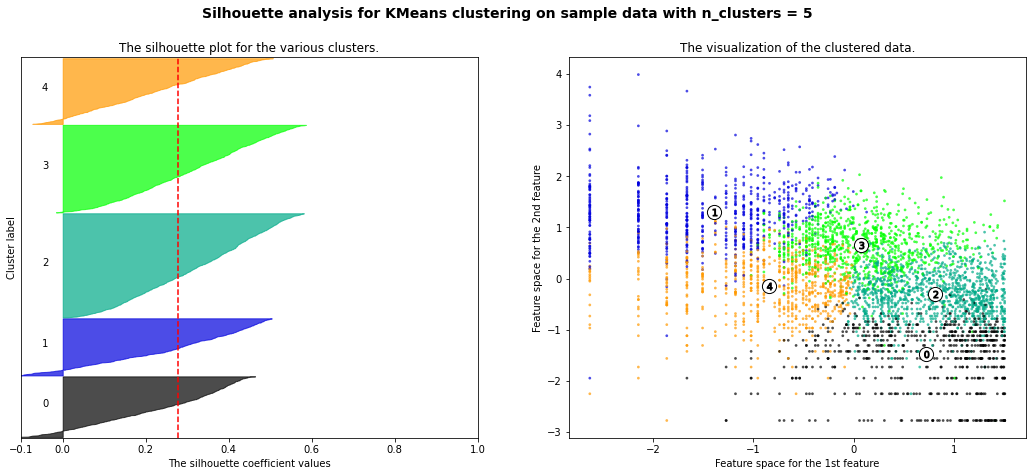

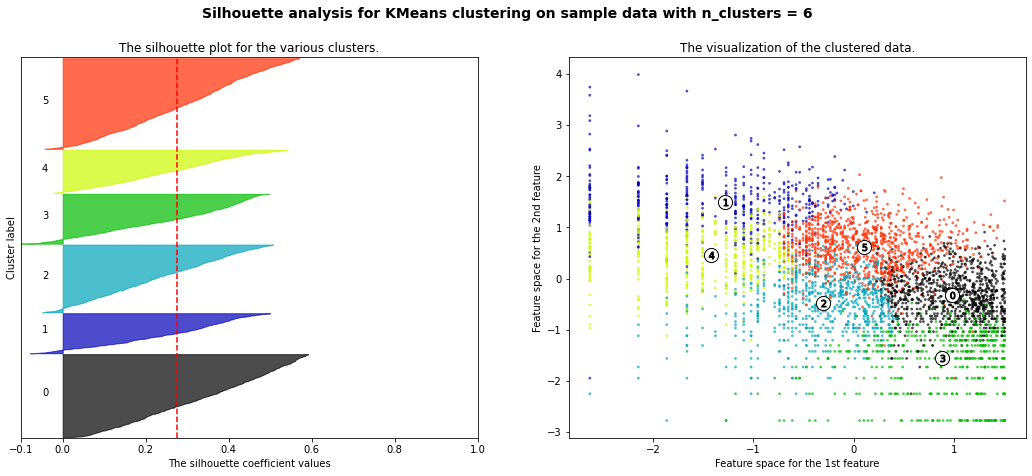

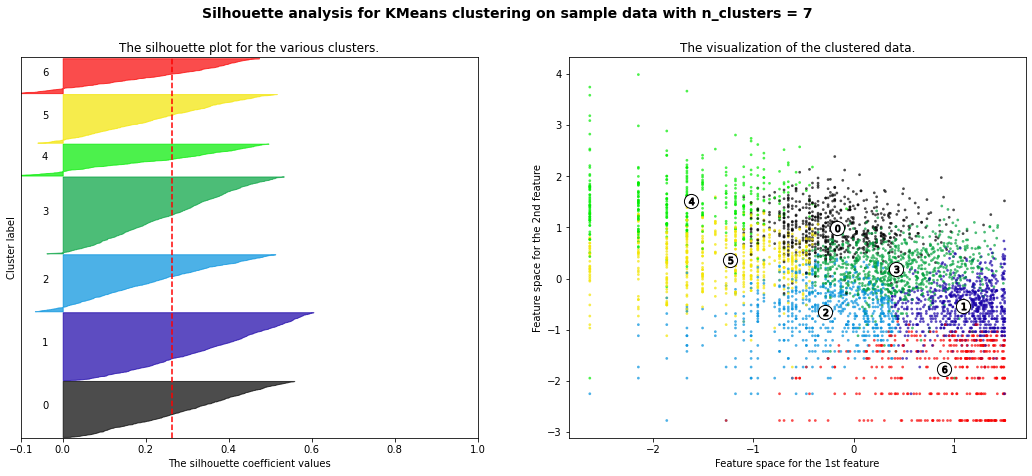

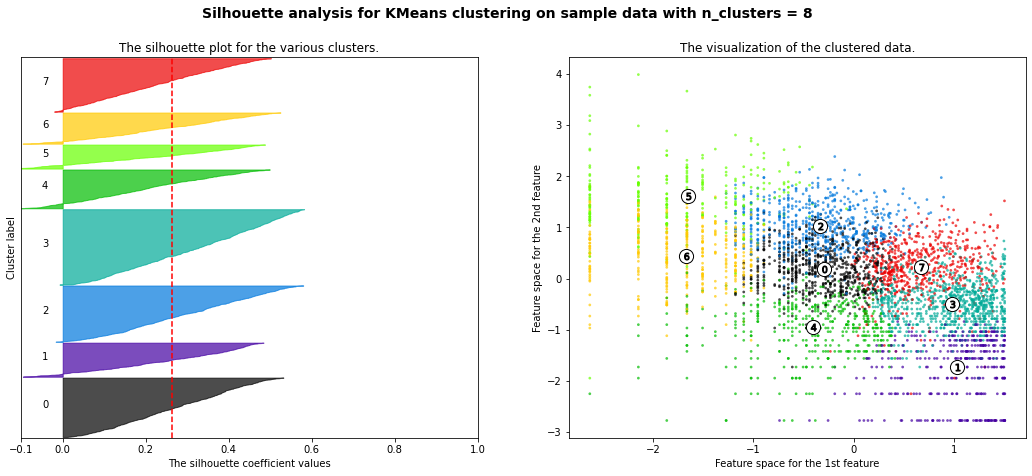

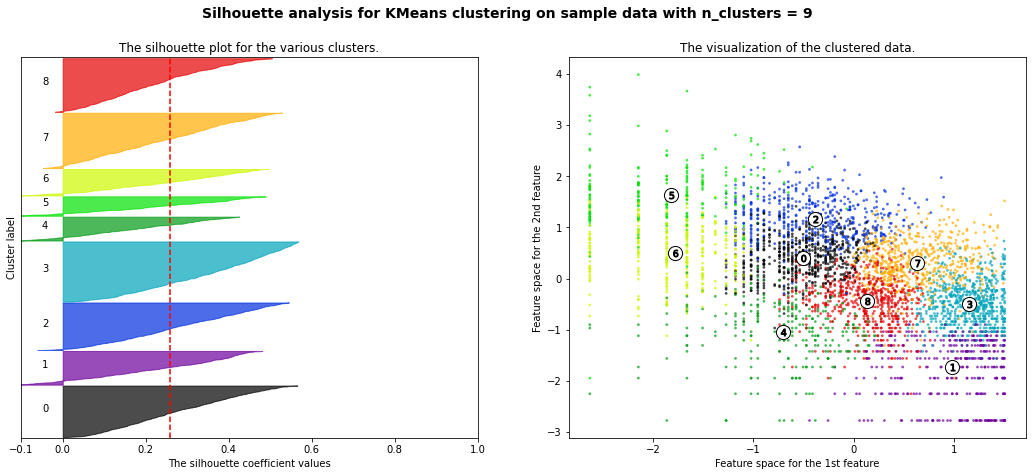

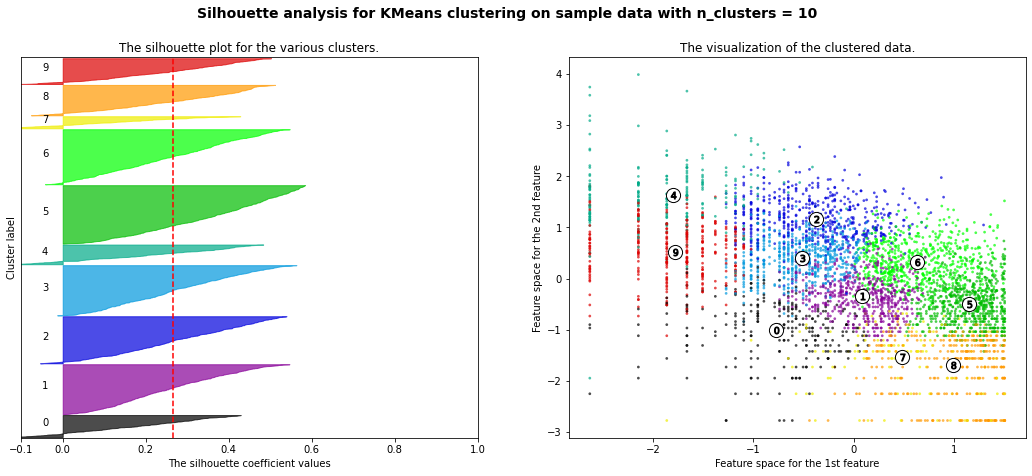

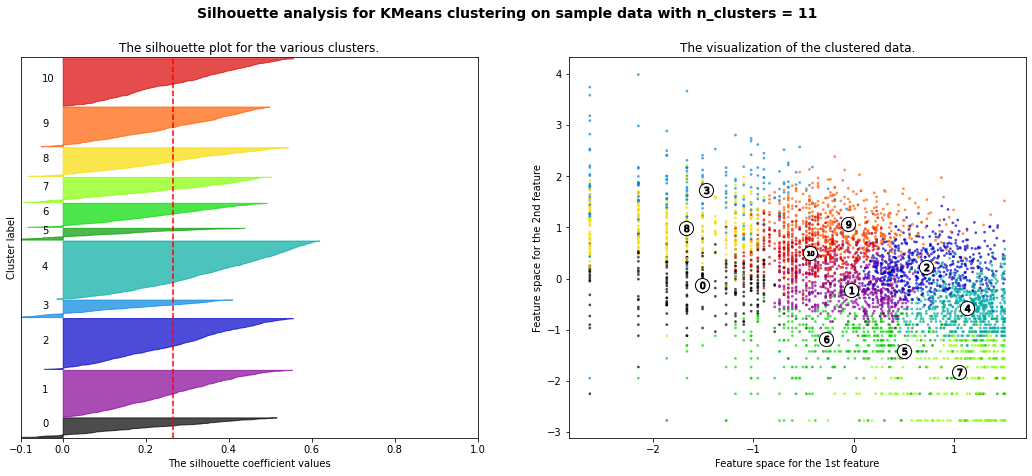

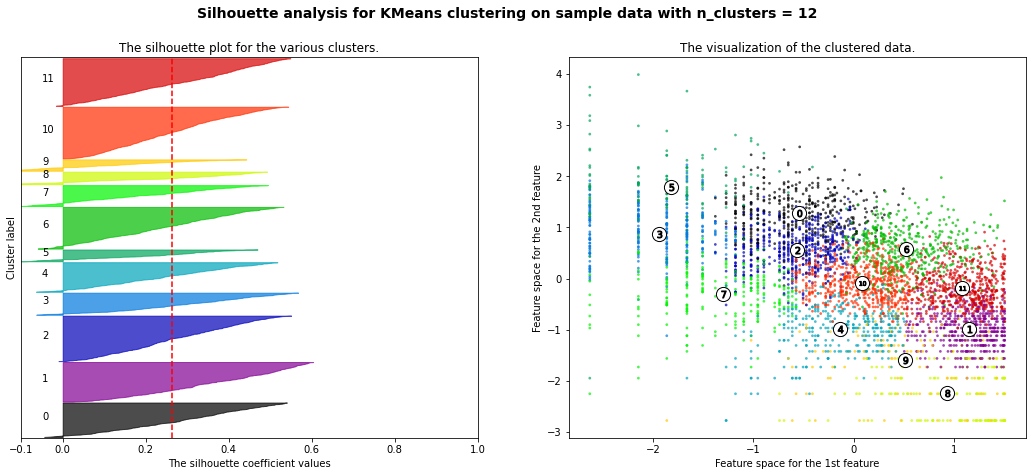

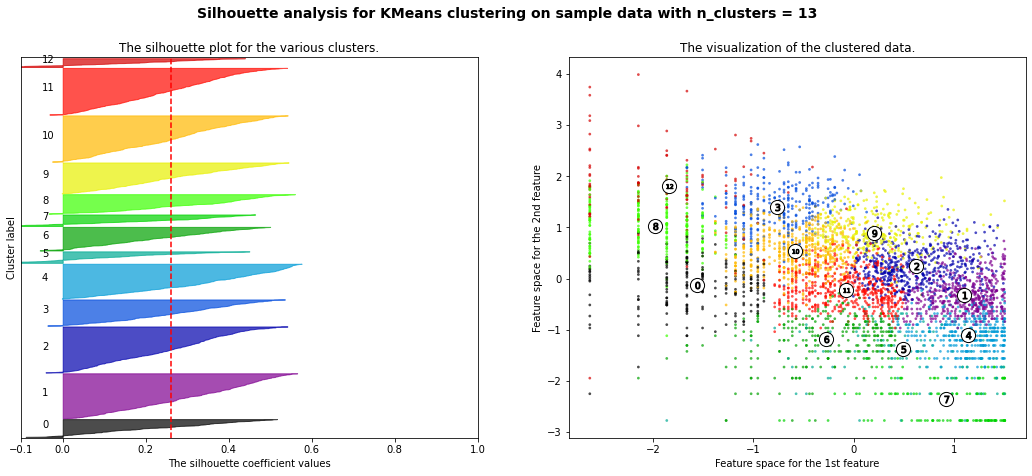

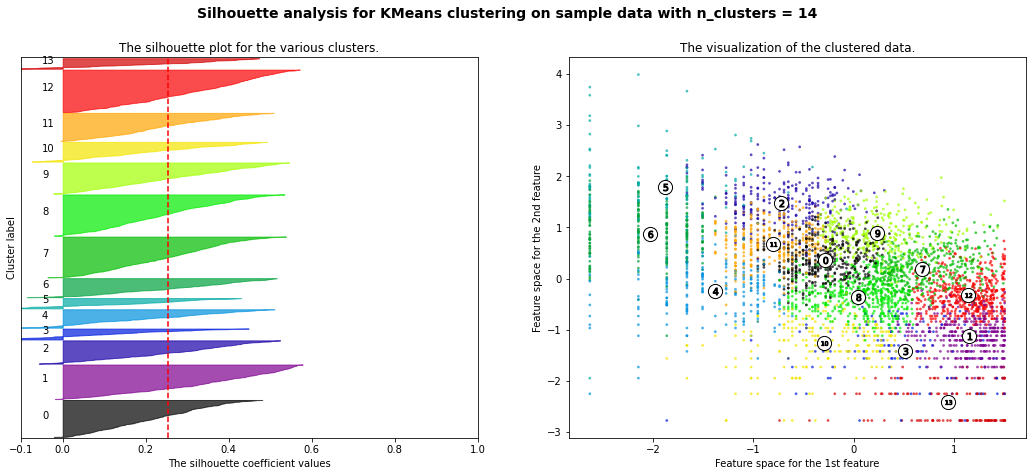

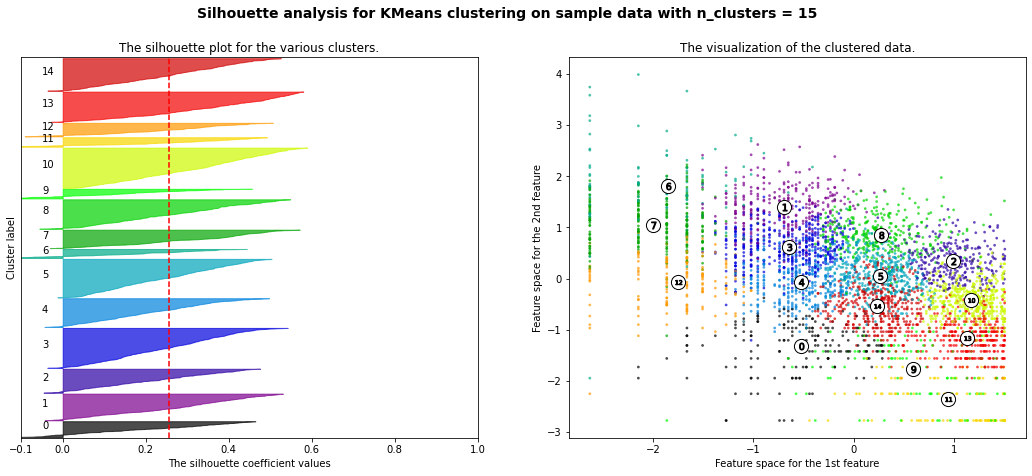

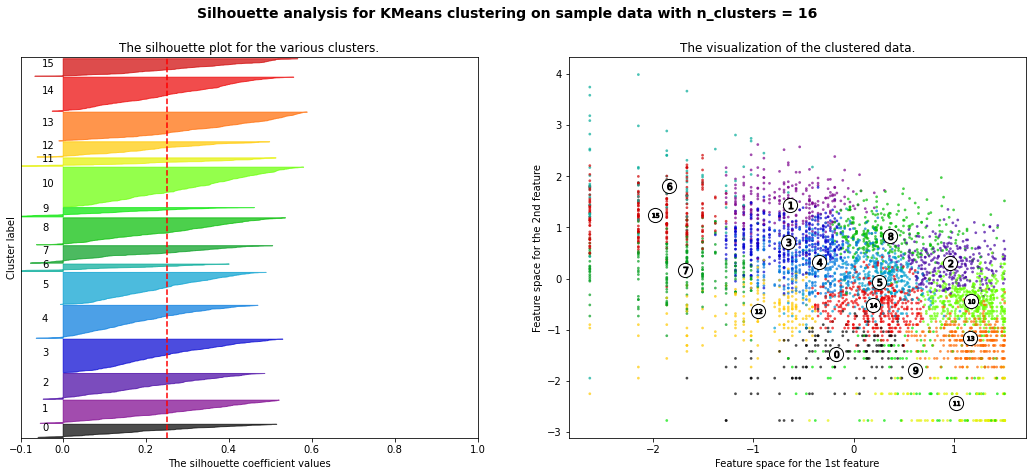

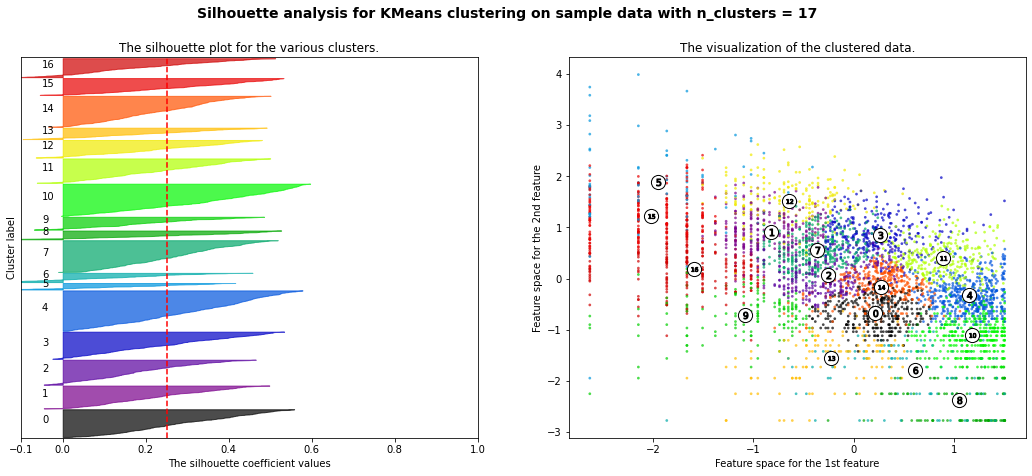

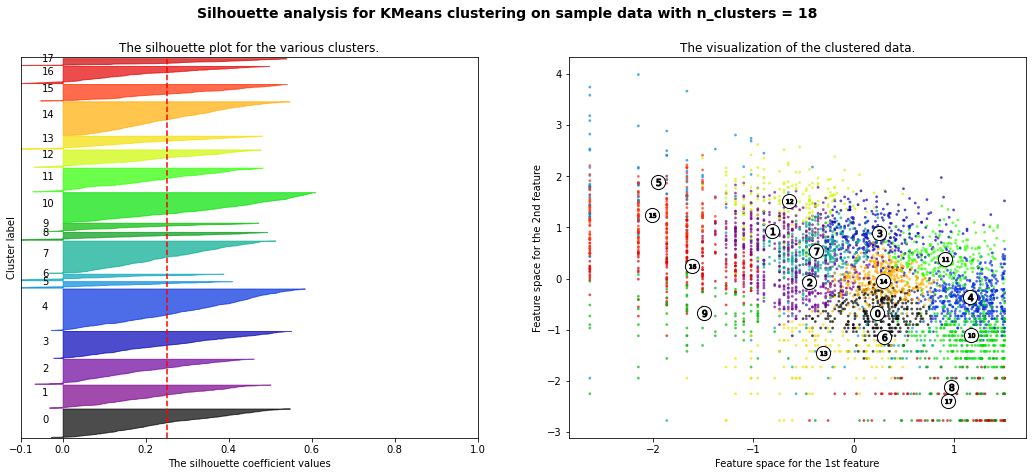

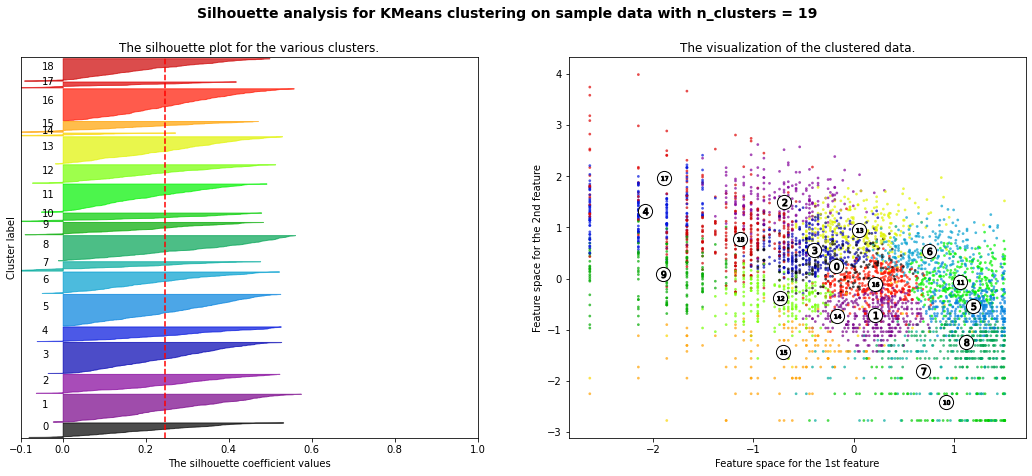

In [21]:
#13
X = X_scaled
for n_clusters in range(2, 20):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

Even though 2 clusters seem to score the best among the tests, we decide that the 7 clusters from the Elbow Test is worth looking into, since segmenting our customers into just 2 clusters doesn't help us as much

In [22]:
#####

In [23]:
r = range(7, 0, -1)
f = range(1, 8)
m = range(1, 8)
r_g = pd.qcut(RFM_final_df['Recency'], q=7, labels=r)
f_g = pd.qcut(RFM_final_df['Frequency'], q=7, labels=f)
m_g = pd.qcut(RFM_final_df['Monetary'], q=7, labels=m)
RFM_final_df = RFM_final_df.assign(R = r_g.values, F = f_g.values, M = m_g.values)

#seperate into 7 quartiles since 7 cllusters
RFM_final_df['sum_val'] = RFM_final_df[['R', 'F', 'M']].sum(axis=1)
RFM_final_df.head()

Recency  Frequency   Monetary  R  F  M  sum_val
CustomerID                                                  
12346       5.786897   0.000000  11.253942  1  1  7        9
12347       0.693147   5.204007   8.368693  7  7  7       21
12348       4.317488   3.433987   7.494007  3  3  6       12
12349       2.944439   4.290459   7.471676  6  5  6       17
12350       5.736572   2.833213   5.812338  1  2  2        5

In [24]:
sns.set(style="whitegrid", font_scale=1.5)

### Since we got k = 7 from our K-means analysis, we decided to look at our boxplots of RFM values

<AxesSubplot:xlabel='cluster_no', ylabel='sum_val'>

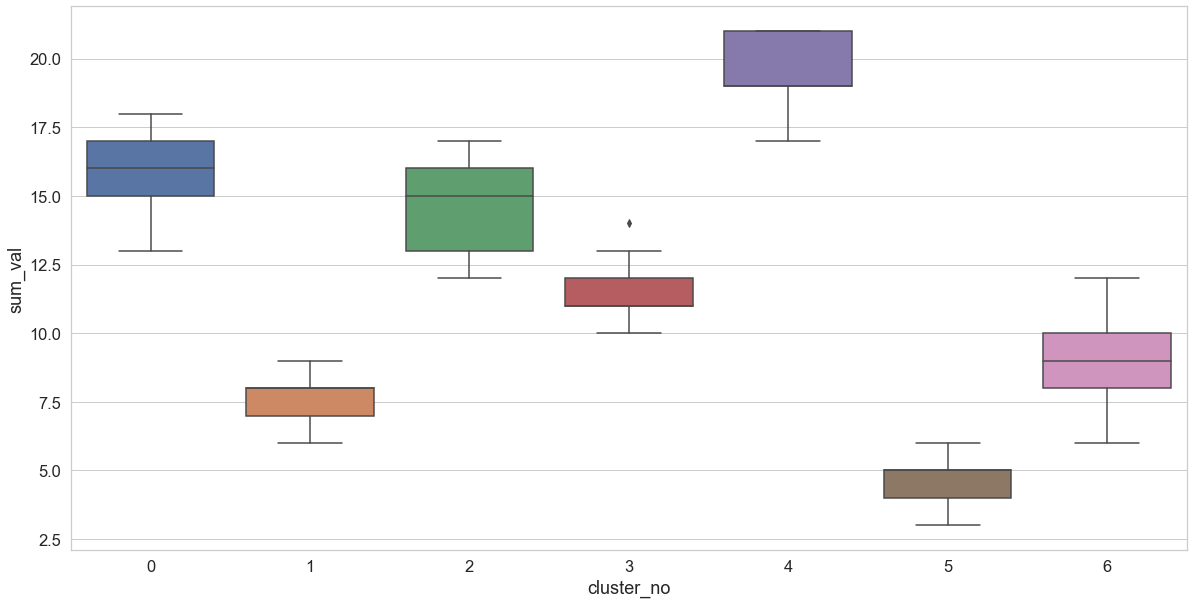

In [25]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
feature_vector = ['R','F', 'M','sum_val']


X_subset = RFM_final_df[feature_vector]
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
labels = KMeans(n_clusters=7, max_iter = 100, random_state=10).fit_predict(X_scaled)
RFM_final_df['cluster_no']= labels
plt.figure(figsize=(20,10))
sns.boxplot(x='cluster_no', y ='sum_val', data = RFM_final_df)

<AxesSubplot:xlabel='cluster_no', ylabel='M'>

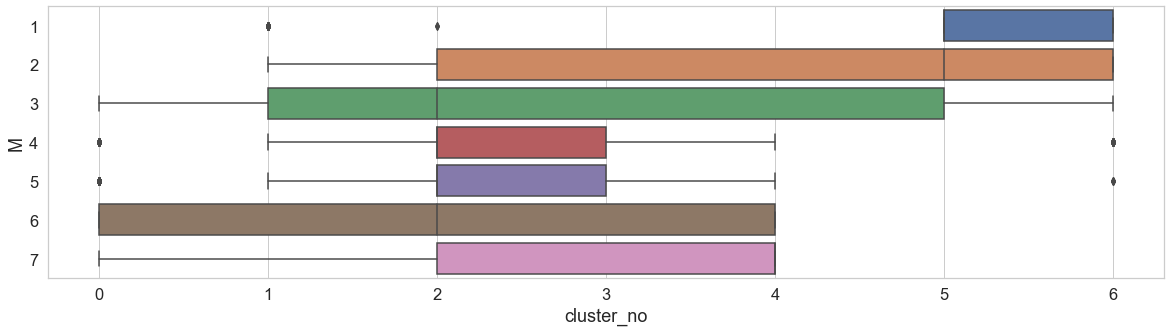

In [26]:
plt.figure(figsize=(20,5))
sns.boxplot(x='cluster_no', y ='M', data = RFM_final_df)

<AxesSubplot:xlabel='cluster_no', ylabel='Frequency'>

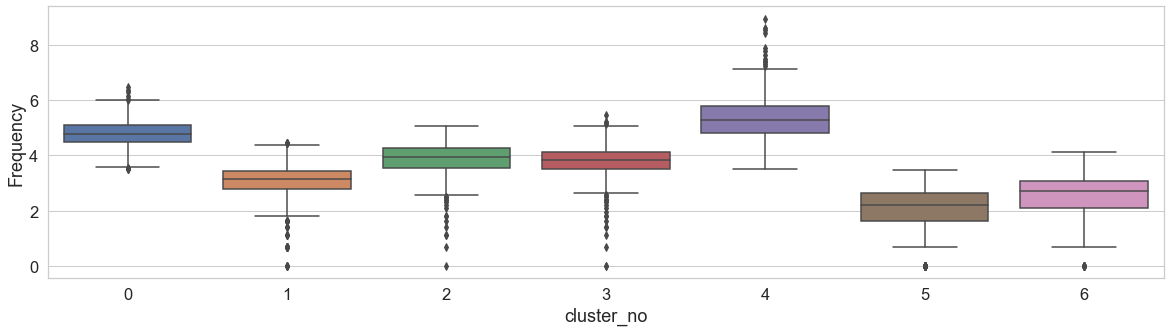

In [27]:
plt.figure(figsize=(20,5))
sns.boxplot(x='cluster_no', y ='Frequency', data = RFM_final_df)

In [28]:
# Decided to group together clusters 0 and 2 -- 1, 3, and 6 -- and then 4 and 5 have their own clusters

### 7 Cluster test for graphs

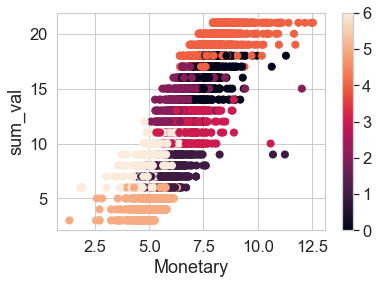

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Monetary'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Monetary')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

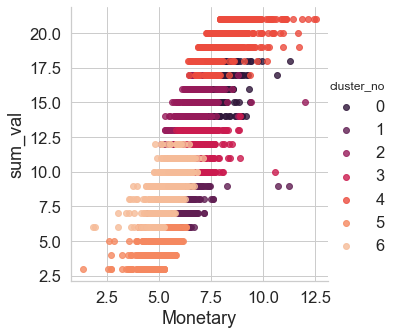

In [30]:
facet = sns.lmplot(data=RFM_final_df, x='Monetary', y='sum_val', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

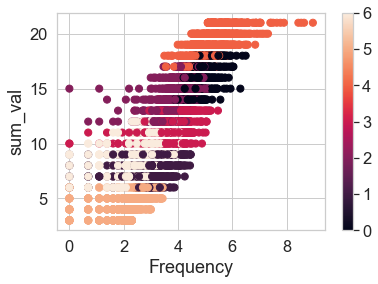

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Frequency'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Frequency')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

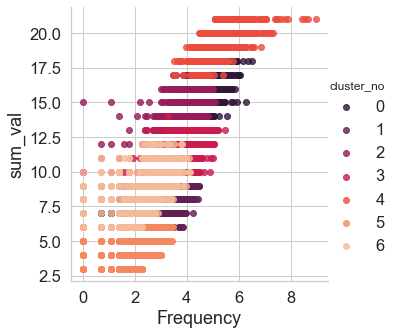

In [32]:

facet = sns.lmplot(data=RFM_final_df, x='Frequency', y='sum_val', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')



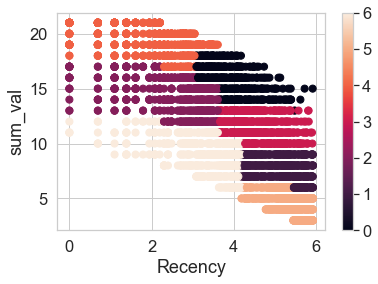

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Recency'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Recency')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

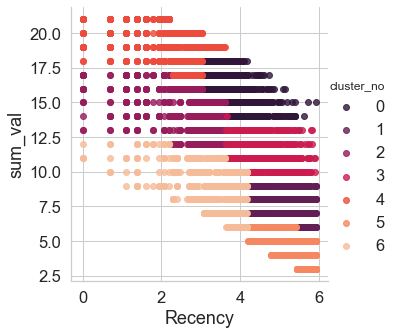

In [34]:
facet = sns.lmplot(data=RFM_final_df, x='Recency', y='sum_val', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

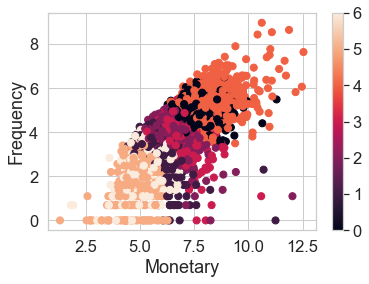

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Monetary'], RFM_final_df['Frequency'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
plt.colorbar(scatter)

fig.show()

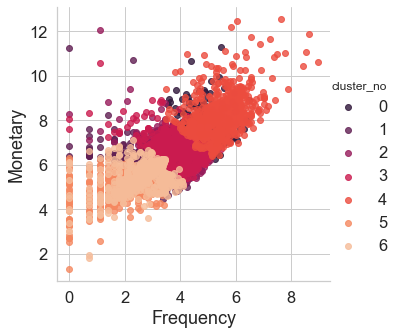

In [36]:
facet = sns.lmplot(data=RFM_final_df, x='Frequency', y='Monetary', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

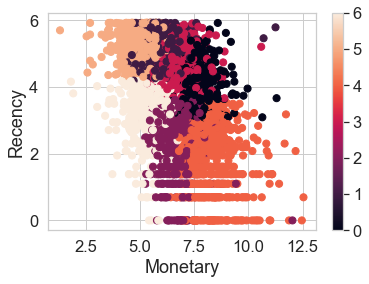

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Monetary'], RFM_final_df['Recency'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Monetary')
ax.set_ylabel('Recency')
plt.colorbar(scatter)

fig.show()

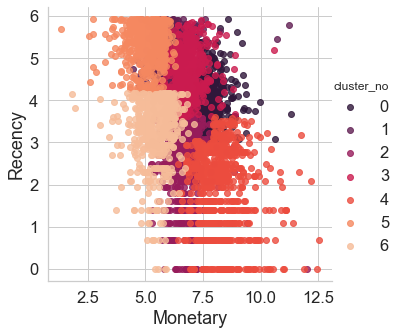

In [38]:
facet = sns.lmplot(data=RFM_final_df, x='Monetary', y='Recency', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

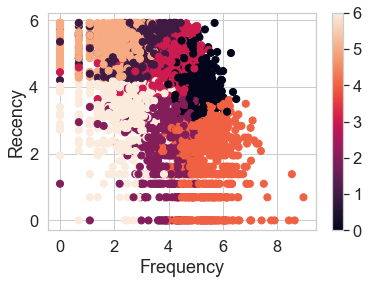

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Frequency'], RFM_final_df['Recency'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
plt.colorbar(scatter)

fig.show()

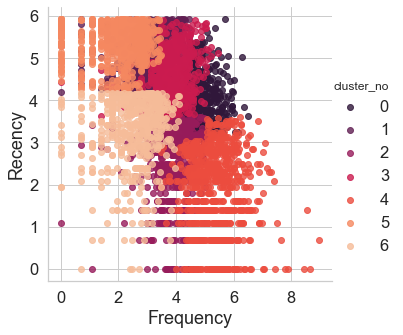

In [40]:
facet = sns.lmplot(data=RFM_final_df, x='Frequency', y='Recency', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

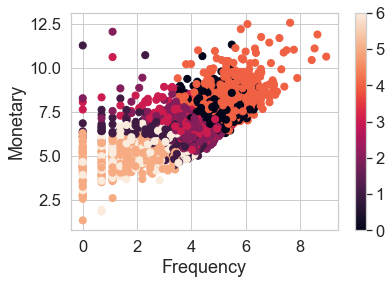

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Frequency'], RFM_final_df['Monetary'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
plt.colorbar(scatter)

fig.show()

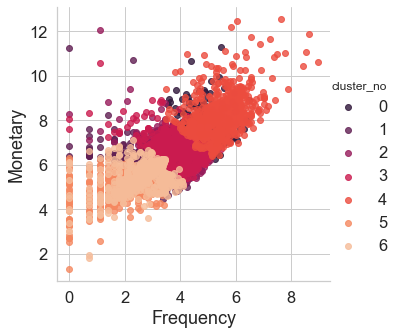

In [42]:
facet = sns.lmplot(data=RFM_final_df, x='Frequency', y='Monetary', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

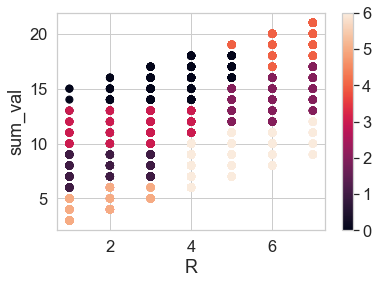

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['R'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('R')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

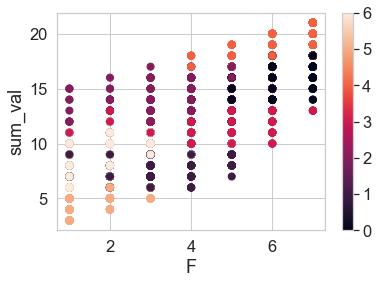

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['F'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('F')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

### Look at the cluster = 7 data and try to infer things

In [45]:
RFM_final_df.groupby('cluster_no')['Frequency', 'Recency'].describe()


Frequency                                                    \
               count      mean       std       min       25%       50%   
cluster_no                                                               
0              550.0  4.803467  0.491031  3.496508  4.488636  4.762174   
1              583.0  3.049802  0.722437  0.000000  2.772589  3.135494   
2              639.0  3.875251  0.603497  0.000000  3.555348  3.931826   
3              641.0  3.809855  0.604329  0.000000  3.526361  3.828641   
4              737.0  5.350355  0.737104  3.496508  4.820282  5.298317   
5              635.0  2.017586  0.850932  0.000000  1.609438  2.197225   
6              553.0  2.531707  0.812590  0.000000  2.079442  2.708050   

                               Recency                                \
                 75%       max   count      mean       std       min   
cluster_no                                                             
0           5.099866  6.492240   550.0  3.931477  0.554534  3.091042   
1           3.433987  4.465908   583.0  5.140034  0.528713  4.189655   
2           4.262680  5.087596   639.0  2.534208  0.888950  0.000000   
3           4.143135  5.472271   641.0  4.550115  0.545108  3.637586   
4           5.780744  8.967887   737.0  1.927653  0.967963  0.000000   
5           2.639057  3.465736   635.0  5.361414  0.435415  4.189655   
6           3.091042  4.110874   553.0  3.297374  0.802607  0.000000   

                                                    
                 25%       50%       75%       max  
cluster_no                                          
0           3.496508  3.891820  4.259134  5.918894  
1           4.672829  5.236442  5.587249  5.924256  
2           2.079442  2.833213  3.218876  3.610918  
3           4.143135  4.465908  4.927254  5.910797  
4           1.386294  2.197225  2.772589  3.610918  
5           5.105945  5.463832  5.693732  5.924256  
6           2.944439  3.465736  3.912023  4.174387

In [46]:
RFM_final_df.groupby('cluster_no')['Monetary', 'sum_val'].describe()

Monetary                                                    \
              count      mean       std       min       25%       50%   
cluster_no                                                              
0             550.0  7.639546  0.607930  6.278446  7.295820  7.603312   
1             583.0  6.031565  0.557278  4.444179  5.742234  6.016108   
2             639.0  6.654002  0.603022  5.094180  6.303625  6.654075   
3             641.0  6.747502  0.557377  5.311628  6.418006  6.703016   
4             737.0  8.235704  0.906689  6.405328  7.614559  8.117002   
5             635.0  5.069811  0.606784  1.321756  4.738649  5.123964   
6             553.0  5.436820  0.655478  1.824549  5.082646  5.501666   

                                sum_val                                   \
                 75%        max   count       mean       std   min   25%   
cluster_no                                                                 
0           7.949333  11.302511   550.0  15.925455  1.330560  13.0  15.0   
1           6.281725  11.253942   583.0   7.665523  0.970153   6.0   7.0   
2           7.028578  12.034528   639.0  14.441315  1.497934  12.0  13.0   
3           7.027181  10.594545   641.0  11.499220  1.075472  10.0  11.0   
4           8.640470  12.543280   737.0  19.491180  1.172716  17.0  19.0   
5           5.519177   6.280845   635.0   4.456693  1.024587   3.0   4.0   
6           5.895339   7.128897   553.0   8.971067  1.549624   6.0   8.0   

                              
             50%   75%   max  
cluster_no                    
0           16.0  17.0  18.0  
1            8.0   8.0   9.0  
2           15.0  16.0  17.0  
3           11.0  12.0  14.0  
4           19.0  21.0  21.0  
5            5.0   5.0   6.0  
6            9.0  10.0  12.0

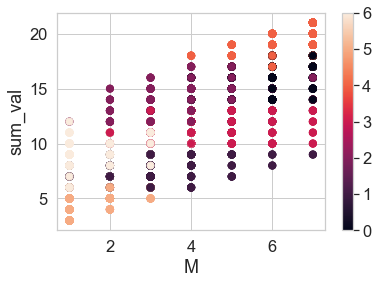

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['M'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('M')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

In [48]:
# Decided to group together clusters 0 and 2 -- 1, 3, and 6 -- and then 4 and 5 have their own clusters

In [49]:
RFM_final_df.loc[(RFM_final_df.cluster_no == 0) | (RFM_final_df.cluster_no == 2) , 'cluster_no'] = 0
RFM_final_df.loc[(RFM_final_df.cluster_no == 1) | (RFM_final_df.cluster_no == 3) | (RFM_final_df.cluster_no == 6) , 'cluster_no'] = 1
RFM_final_df.loc[(RFM_final_df.cluster_no == 4) , 'cluster_no'] = 2
RFM_final_df.loc[RFM_final_df.cluster_no == 5, 'cluster_no'] = 3

In [50]:
RFM_final_df

Recency  Frequency   Monetary  R  F  M  sum_val  cluster_no
CustomerID                                                              
12346       5.786897   0.000000  11.253942  1  1  7        9           1
12347       0.693147   5.204007   8.368693  7  7  7       21           2
12348       4.317488   3.433987   7.494007  3  3  6       12           1
12349       2.944439   4.290459   7.471676  6  5  6       17           2
12350       5.736572   2.833213   5.812338  1  2  2        5           3
...              ...        ...        ... .. .. ..      ...         ...
18280       5.627621   2.302585   5.196285  1  1  1        3           3
18281       5.198497   1.945910   4.392224  2  1  1        4           3
18282       2.079442   2.484907   5.182064  7  2  1       10           1
18283       1.386294   6.628041   7.647252  7  7  6       20           2
18287       3.761200   4.248495   7.516041  4  5  6       15           0

[4338 rows x 8 columns]

### 4 Clusters

In [51]:
#Since we have quartiles now, change the RFM values

r = range(4, 0, -1)
f = range(1, 5)
m = range(1, 5)
r_g = pd.qcut(RFM_final_df['Recency'], q=4, labels=r)
f_g = pd.qcut(RFM_final_df['Frequency'], q=4, labels=f)
m_g = pd.qcut(RFM_final_df['Monetary'], q=4, labels=m)
RFM_final_df = RFM_final_df.assign(R = r_g.values, F = f_g.values, M = m_g.values)


RFM_final_df['sum_val'] = RFM_final_df[['R', 'F', 'M']].sum(axis=1)


RFM_4clusters = RFM_final_df #get this for 4 cluster analysis I think



RFM_final_df.head()

Recency  Frequency   Monetary  R  F  M  sum_val  cluster_no
CustomerID                                                              
12346       5.786897   0.000000  11.253942  1  1  4        6           1
12347       0.693147   5.204007   8.368693  4  4  4       12           2
12348       4.317488   3.433987   7.494007  2  2  4        8           1
12349       2.944439   4.290459   7.471676  3  3  4       10           2
12350       5.736572   2.833213   5.812338  1  1  2        4           3

In [52]:
RFM_final_df.groupby('cluster_no').describe()

Recency                                                    \
             count      mean       std       min       25%       50%   
cluster_no                                                             
0           1189.0  3.180548  1.025795  0.000000  2.772589  3.295837   
1           1777.0  4.353805  0.981446  0.000000  3.828641  4.356709   
2            737.0  1.927653  0.967963  0.000000  1.386294  2.197225   
3            635.0  5.361414  0.435415  4.189655  5.105945  5.463832   

                               Frequency            ...  Monetary             \
                 75%       max     count      mean  ...       75%        max   
cluster_no                                          ...                        
0           3.806662  5.918894    1189.0  4.304619  ...  7.602910  12.034528   
1           5.129899  5.924256    1777.0  3.162738  ...  6.585841  11.253942   
2           2.772589  3.610918     737.0  5.350355  ...  8.640470  12.543280   
3           5.693732  5.924256     635.0  2.017586  ...  5.519177   6.280845   

           sum_val                                                    
             count       mean       std  min   25%   50%   75%   max  
cluster_no                                                            
0           1189.0   9.268293  1.080675  6.0   9.0   9.0  10.0  11.0  
1           1777.0   6.101294  1.261382  4.0   5.0   6.0   7.0   9.0  
2            737.0  11.545455  0.613179  9.0  11.0  12.0  12.0  12.0  
3            635.0   3.442520  0.587262  3.0   3.0   3.0   4.0   5.0  

[4 rows x 32 columns]

In [53]:
# Before running the next visualizations, we need to analyze our clusters and name them accordingly

In [54]:
# Plots using recency will be a bit weird since lower values are higher. 

# This problem is fixed when using R values instead, but then the plot doesn't look that great because of the small 
# range of values for RFM

In [55]:
RFM_final_df

Recency  Frequency   Monetary  R  F  M  sum_val  cluster_no
CustomerID                                                              
12346       5.786897   0.000000  11.253942  1  1  4        6           1
12347       0.693147   5.204007   8.368693  4  4  4       12           2
12348       4.317488   3.433987   7.494007  2  2  4        8           1
12349       2.944439   4.290459   7.471676  3  3  4       10           2
12350       5.736572   2.833213   5.812338  1  1  2        4           3
...              ...        ...        ... .. .. ..      ...         ...
18280       5.627621   2.302585   5.196285  1  1  1        3           3
18281       5.198497   1.945910   4.392224  1  1  1        3           3
18282       2.079442   2.484907   5.182064  4  1  1        6           1
18283       1.386294   6.628041   7.647252  4  4  4       12           2
18287       3.761200   4.248495   7.516041  3  3  4       10           0

[4338 rows x 8 columns]

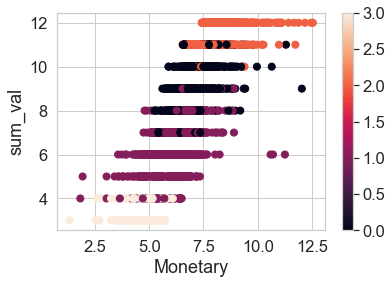

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Monetary'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Monetary')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

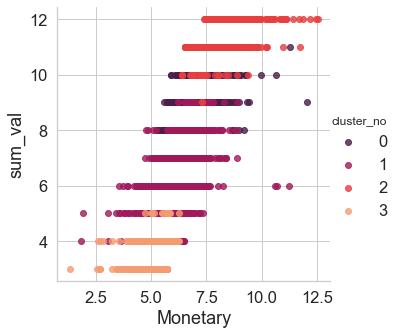

In [57]:
facet = sns.lmplot(data=RFM_final_df, x='Monetary', y='sum_val', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

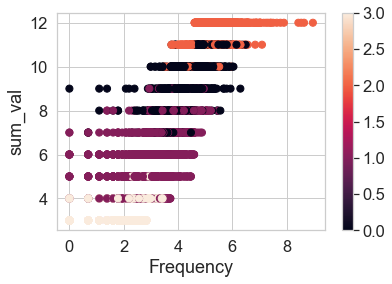

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Frequency'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Frequency')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

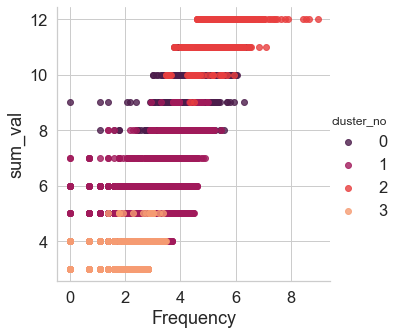

In [59]:
facet = sns.lmplot(data=RFM_final_df, x='Frequency', y='sum_val', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

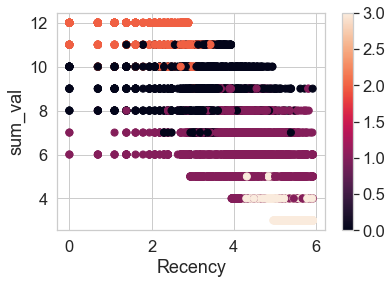

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Recency'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Recency')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

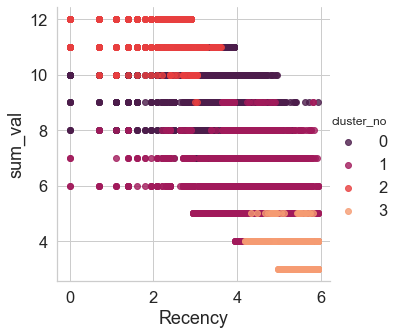

In [61]:
facet = sns.lmplot(data=RFM_final_df, x='Recency', y='sum_val', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

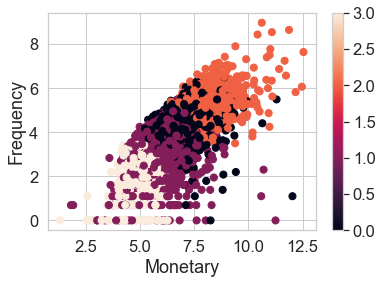

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Monetary'], RFM_final_df['Frequency'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
plt.colorbar(scatter)

fig.show()

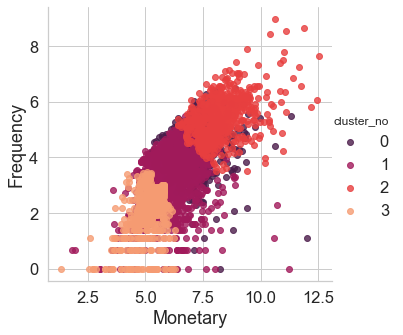

In [63]:
facet = sns.lmplot(data=RFM_final_df, x='Monetary', y='Frequency', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

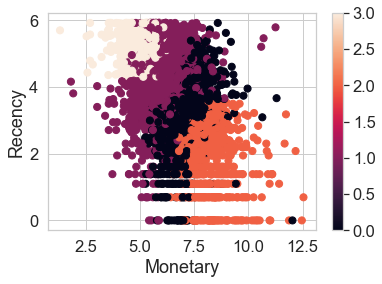

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Monetary'], RFM_final_df['Recency'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Monetary')
ax.set_ylabel('Recency')
plt.colorbar(scatter)

fig.show()

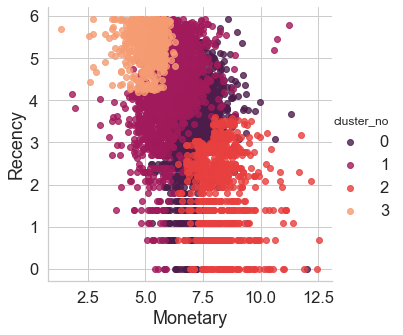

In [65]:
facet = sns.lmplot(data=RFM_final_df, x='Monetary', y='Recency', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

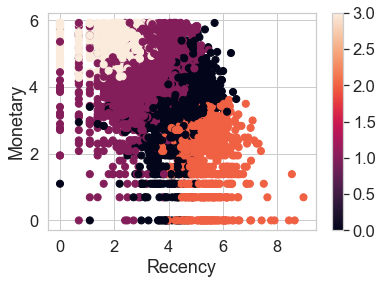

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['Frequency'], RFM_final_df['Recency'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
plt.colorbar(scatter)

fig.show()

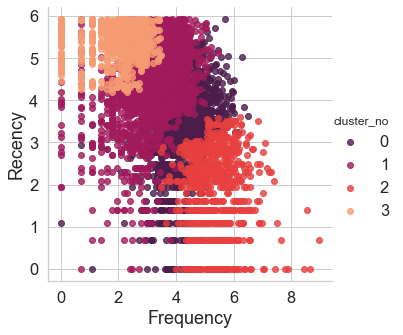

In [67]:
facet = sns.lmplot(data=RFM_final_df, x='Frequency', y='Recency', hue='cluster_no', 
                   fit_reg=False, legend=True, legend_out=True, palette='rocket')

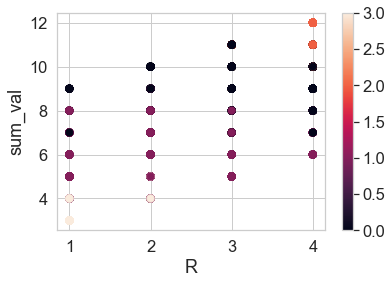

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['R'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('R')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

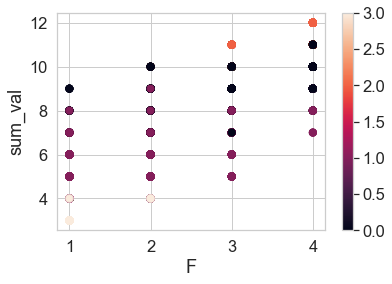

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['F'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('F')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

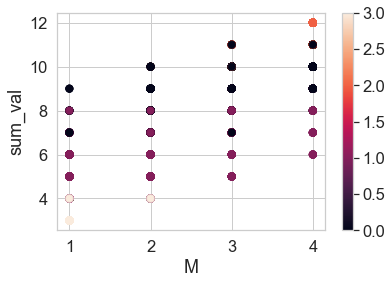

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(RFM_final_df['M'], RFM_final_df['sum_val'], c=RFM_final_df['cluster_no'],s=50)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('M')
ax.set_ylabel('sum_val')
plt.colorbar(scatter)

fig.show()

In [71]:
RFM_final_df

Recency  Frequency   Monetary  R  F  M  sum_val  cluster_no
CustomerID                                                              
12346       5.786897   0.000000  11.253942  1  1  4        6           1
12347       0.693147   5.204007   8.368693  4  4  4       12           2
12348       4.317488   3.433987   7.494007  2  2  4        8           1
12349       2.944439   4.290459   7.471676  3  3  4       10           2
12350       5.736572   2.833213   5.812338  1  1  2        4           3
...              ...        ...        ... .. .. ..      ...         ...
18280       5.627621   2.302585   5.196285  1  1  1        3           3
18281       5.198497   1.945910   4.392224  1  1  1        3           3
18282       2.079442   2.484907   5.182064  4  1  1        6           1
18283       1.386294   6.628041   7.647252  4  4  4       12           2
18287       3.761200   4.248495   7.516041  3  3  4       10           0

[4338 rows x 8 columns]

### Look at the cluster = 4 data and try to infer things

In [72]:
RFM_final_df.groupby('cluster_no')['Frequency', 'Recency'].describe()

Frequency                                                    \
               count      mean       std       min       25%       50%   
cluster_no                                                               
0             1189.0  4.304619  0.722071  0.000000  3.850148  4.330733   
1             1777.0  3.162738  0.887236  0.000000  2.708050  3.258097   
2              737.0  5.350355  0.737104  3.496508  4.820282  5.298317   
3              635.0  2.017586  0.850932  0.000000  1.609438  2.197225   

                               Recency                                \
                 75%       max   count      mean       std       min   
cluster_no                                                             
0           4.770685  6.492240  1189.0  3.180548  1.025795  0.000000   
1           3.761200  5.472271  1777.0  4.353805  0.981446  0.000000   
2           5.780744  8.967887   737.0  1.927653  0.967963  0.000000   
3           2.639057  3.465736   635.0  5.361414  0.435415  4.189655   

                                                    
                 25%       50%       75%       max  
cluster_no                                          
0           2.772589  3.295837  3.806662  5.918894  
1           3.828641  4.356709  5.129899  5.924256  
2           1.386294  2.197225  2.772589  3.610918  
3           5.105945  5.463832  5.693732  5.924256

In [73]:

RFM_final_df.groupby('cluster_no')['Monetary', 'sum_val'].describe()

Monetary                                                    \
              count      mean       std       min       25%       50%   
cluster_no                                                              
0            1189.0  7.109889  0.779579  5.094180  6.562755  7.087925   
1            1777.0  6.104734  0.798150  1.824549  5.654452  6.102424   
2             737.0  8.235704  0.906689  6.405328  7.614559  8.117002   
3             635.0  5.069811  0.606784  1.321756  4.738649  5.123964   

                                sum_val                                        \
                 75%        max   count       mean       std  min   25%   50%   
cluster_no                                                                      
0           7.602910  12.034528  1189.0   9.268293  1.080675  6.0   9.0   9.0   
1           6.585841  11.253942  1777.0   6.101294  1.261382  4.0   5.0   6.0   
2           8.640470  12.543280   737.0  11.545455  0.613179  9.0  11.0  12.0   
3           5.519177   6.280845   635.0   3.442520  0.587262  3.0   3.0   3.0   

                        
             75%   max  
cluster_no              
0           10.0  11.0  
1            7.0   9.0  
2           12.0  12.0  
3            4.0   5.0

In [74]:
RFM_final_df.groupby('cluster_no')['R', 'F', 'M'].describe()

R                     F                     M                
           count unique top freq count unique top freq count unique top freq
cluster_no                                                                  
0           1189      4   3  571  1189      4   3  541  1189      4   3  532
1           1777      4   2  728  1777      4   2  778  1777      4   2  759
2            737      2   4  632   737      3   4  625   737      3   4  627
3            635      2   1  522   635      2   1  553   635      2   1  549

In [75]:
RFM_final_df.head()

Recency  Frequency   Monetary  R  F  M  sum_val  cluster_no
CustomerID                                                              
12346       5.786897   0.000000  11.253942  1  1  4        6           1
12347       0.693147   5.204007   8.368693  4  4  4       12           2
12348       4.317488   3.433987   7.494007  2  2  4        8           1
12349       2.944439   4.290459   7.471676  3  3  4       10           2
12350       5.736572   2.833213   5.812338  1  1  2        4           3

In [76]:
#RFM_final_df['R', 'F', 'M'].astype(int)

In [77]:
RFM_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Recency     4338 non-null   float64 
 1   Frequency   4338 non-null   float64 
 2   Monetary    4338 non-null   float64 
 3   R           4338 non-null   category
 4   F           4338 non-null   category
 5   M           4338 non-null   category
 6   sum_val     4338 non-null   int64   
 7   cluster_no  4338 non-null   int32   
dtypes: category(3), float64(3), int32(1), int64(1)
memory usage: 359.5 KB


We determined that the ranking of best clusters goes as: 2 > 0 > 1 > 3


  cluster_no  CustomerID
0     Bronze         635
1       Gold        1189
2   Platinum         737
3     Silver        1777


<AxesSubplot:xlabel='cluster_no', ylabel='CustomerID'>

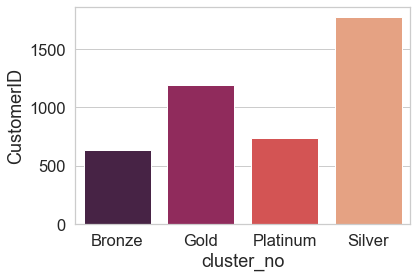

In [91]:
test = RFM_final_df

test = test.reset_index()
test.loc[test['cluster_no'] == 2, 'cluster_no'] = 'Platinum'
test.loc[test['cluster_no'] == 0, 'cluster_no'] = 'Gold'
test.loc[test['cluster_no'] == 1, 'cluster_no'] = 'Silver'
test.loc[test['cluster_no'] == 3, 'cluster_no'] = 'Bronze'
test = test.groupby('cluster_no')['CustomerID'].nunique().reset_index()
print(test)
#test.drop([0], inplace = True)
fig.set_size_inches(10, 16)
sns.barplot(data=test,x='cluster_no', y='CustomerID', palette='rocket', orient= True)

0    1777
1    1189
2     737
3     635
Name: CustomerID, dtype: int64


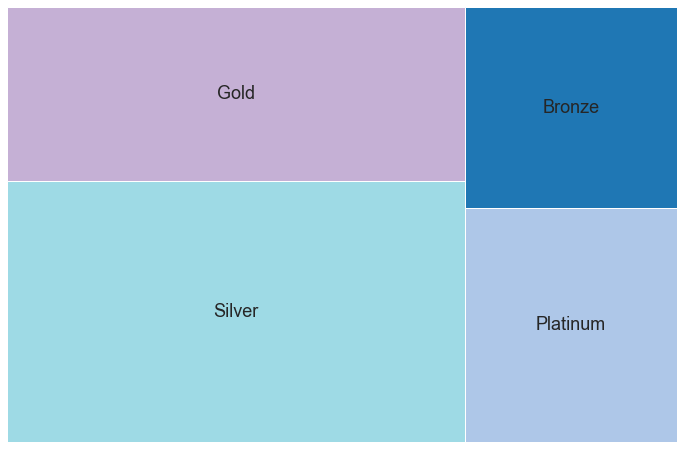

In [79]:
print(test['CustomerID'])
import squarify
import matplotlib
cmap = matplotlib.cm.tab20
mini = min(test['CustomerID'])
maxi = max(test['CustomerID'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in test['CustomerID']]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes = test['CustomerID'],
             label = ['Silver',
                      'Gold',
                      'Platinum',
                      'Bronze'], alpha=1, color = colors)
plt.axis('off')
plt.show()

In [80]:
RFM_final_df.max()

Recency        5.924256
Frequency      8.967887
Monetary      12.543280
R              1.000000
F              4.000000
M              4.000000
sum_val       12.000000
cluster_no     3.000000
dtype: float64

In [81]:
RFM_relationships = RFM_final_df.groupby('cluster_no').mean()

In [82]:
RFM_relationships

Recency  Frequency  Monetary    sum_val
cluster_no                                          
0           3.180548   4.304619  7.109889   9.268293
1           4.353805   3.162738  6.104734   6.101294
2           1.927653   5.350355  8.235704  11.545455
3           5.361414   2.017586  5.069811   3.442520

In [83]:
RFM_relationships.max()

Recency       5.361414
Frequency     5.350355
Monetary      8.235704
sum_val      11.545455
dtype: float64

   cluster_no   Recency  Frequency  Monetary    sum_val
0           0  3.180548   4.304619  7.109889   9.268293
1           1  4.353805   3.162738  6.104734   6.101294
2           2  1.927653   5.350355  8.235704  11.545455
3           3  5.361414   2.017586  5.069811   3.442520
  cluster_no   Recency  Frequency  Monetary    sum_val
0       Gold  3.180548   4.304619  7.109889   9.268293
1     Silver  4.353805   3.162738  6.104734   6.101294
2   Platinum  1.927653   5.350355  8.235704  11.545455
3     Bronze  5.361414   2.017586  5.069811   3.442520
  cluster_no   Recency  Frequency  Monetary    sum_val
0     Bronze  5.361414   2.017586  5.069811   3.442520
1       Gold  3.180548   4.304619  7.109889   9.268293
2   Platinum  1.927653   5.350355  8.235704  11.545455
3     Silver  4.353805   3.162738  6.104734   6.101294


<AxesSubplot:xlabel='cluster_no', ylabel='sum_val'>

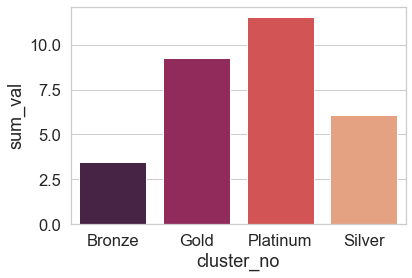

In [84]:
test = RFM_relationships

test = test.reset_index()
print(test)
test.loc[test['cluster_no'] == 2, 'cluster_no'] = 'Platinum'
test.loc[test['cluster_no'] == 0, 'cluster_no'] = 'Gold'
test.loc[test['cluster_no'] == 1, 'cluster_no'] = 'Silver'
test.loc[test['cluster_no'] == 3, 'cluster_no'] = 'Bronze'
print(test)
test = test.groupby('cluster_no')['Recency', 'Frequency','Monetary', 'sum_val'].mean().reset_index()
print(test)
#test.drop([0], inplace = True)
fig.set_size_inches(10, 16)
sns.barplot(data=test,x='cluster_no', y='sum_val', palette='rocket', orient= True)
#plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3', '4'])

   cluster_no   Recency  Frequency  Monetary    sum_val
0           0  3.180548   4.304619  7.109889   9.268293
1           1  4.353805   3.162738  6.104734   6.101294
2           2  1.927653   5.350355  8.235704  11.545455
3           3  5.361414   2.017586  5.069811   3.442520
  cluster_no   Recency  Frequency  Monetary    sum_val
0       Gold  3.180548   4.304619  7.109889   9.268293
1     Silver  4.353805   3.162738  6.104734   6.101294
2   Platinum  1.927653   5.350355  8.235704  11.545455
3     Bronze  5.361414   2.017586  5.069811   3.442520
  cluster_no   Recency  Frequency  Monetary    sum_val
0     Bronze  5.361414   2.017586  5.069811   3.442520
1       Gold  3.180548   4.304619  7.109889   9.268293
2   Platinum  1.927653   5.350355  8.235704  11.545455
3     Silver  4.353805   3.162738  6.104734   6.101294


<AxesSubplot:xlabel='cluster_no', ylabel='Frequency'>

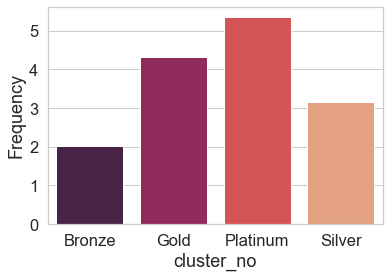

In [85]:
test = RFM_relationships

test = test.reset_index()
print(test)
test.loc[test['cluster_no'] == 2, 'cluster_no'] = 'Platinum'
test.loc[test['cluster_no'] == 0, 'cluster_no'] = 'Gold'
test.loc[test['cluster_no'] == 1, 'cluster_no'] = 'Silver'
test.loc[test['cluster_no'] == 3, 'cluster_no'] = 'Bronze'
print(test)
test = test.groupby('cluster_no')['Recency', 'Frequency','Monetary', 'sum_val'].mean().reset_index()
print(test)
#test.drop([0], inplace = True)
fig.set_size_inches(10, 16)
sns.barplot(data=test,x='cluster_no', y='Frequency', palette='rocket', orient= True)

   cluster_no   Recency  Frequency  Monetary    sum_val
0           0  3.180548   4.304619  7.109889   9.268293
1           1  4.353805   3.162738  6.104734   6.101294
2           2  1.927653   5.350355  8.235704  11.545455
3           3  5.361414   2.017586  5.069811   3.442520
  cluster_no   Recency  Frequency  Monetary    sum_val
0     Bronze  5.361414   2.017586  5.069811   3.442520
1       Gold  3.180548   4.304619  7.109889   9.268293
2   Platinum  1.927653   5.350355  8.235704  11.545455
3     Silver  4.353805   3.162738  6.104734   6.101294


<AxesSubplot:xlabel='cluster_no', ylabel='Monetary'>

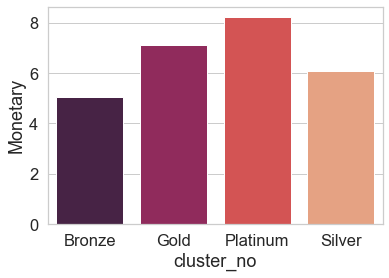

In [86]:
test = RFM_relationships

test = test.reset_index()
print(test)
test.loc[test['cluster_no'] == 2, 'cluster_no'] = 'Platinum'
test.loc[test['cluster_no'] == 0, 'cluster_no'] = 'Gold'
test.loc[test['cluster_no'] == 1, 'cluster_no'] = 'Silver'
test.loc[test['cluster_no'] == 3, 'cluster_no'] = 'Bronze'
test = test.groupby('cluster_no')['Recency', 'Frequency','Monetary', 'sum_val'].mean().reset_index()
print(test)
#test.drop([0], inplace = True)
fig.set_size_inches(10, 16)
sns.barplot(data=test,x='cluster_no', y='Monetary', palette='rocket', orient= True)

   cluster_no   Recency  Frequency  Monetary    sum_val
0           0  3.180548   4.304619  7.109889   9.268293
1           1  4.353805   3.162738  6.104734   6.101294
2           2  1.927653   5.350355  8.235704  11.545455
3           3  5.361414   2.017586  5.069811   3.442520
  cluster_no   Recency  Frequency  Monetary    sum_val
0     Bronze  5.361414   2.017586  5.069811   3.442520
1       Gold  3.180548   4.304619  7.109889   9.268293
2   Platinum  1.927653   5.350355  8.235704  11.545455
3     Silver  4.353805   3.162738  6.104734   6.101294


<AxesSubplot:xlabel='cluster_no', ylabel='Recency'>

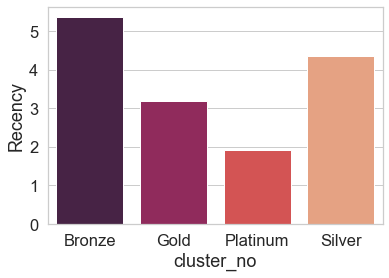

In [87]:
test = RFM_relationships

test = test.reset_index()
print(test)
test.loc[test['cluster_no'] == 2, 'cluster_no'] = 'Platinum'
test.loc[test['cluster_no'] == 0, 'cluster_no'] = 'Gold'
test.loc[test['cluster_no'] == 1, 'cluster_no'] = 'Silver'
test.loc[test['cluster_no'] == 3, 'cluster_no'] = 'Bronze'
test = test.groupby('cluster_no')['Recency', 'Frequency','Monetary', 'sum_val'].mean().reset_index()
print(test)
#test.drop([0], inplace = True)
fig.set_size_inches(10, 16)
sns.barplot(data=test,x='cluster_no', y='Recency', palette='rocket', orient= True)

      CustomerID   Recency  Frequency   Monetary  R  F  M  sum_val  cluster_no
0          12346  5.786897   0.000000  11.253942  1  1  4        6           1
1          12347  0.693147   5.204007   8.368693  4  4  4       12           2
2          12348  4.317488   3.433987   7.494007  2  2  4        8           1
3          12349  2.944439   4.290459   7.471676  3  3  4       10           2
4          12350  5.736572   2.833213   5.812338  1  1  2        4           3
...          ...       ...        ...        ... .. .. ..      ...         ...
4333       18280  5.627621   2.302585   5.196285  1  1  1        3           3
4334       18281  5.198497   1.945910   4.392224  1  1  1        3           3
4335       18282  2.079442   2.484907   5.182064  4  1  1        6           1
4336       18283  1.386294   6.628041   7.647252  4  4  4       12           2
4337       18287  3.761200   4.248495   7.516041  3  3  4       10           0

[4338 rows x 9 columns]
  cluster_no         R     

<AxesSubplot:xlabel='cluster_no', ylabel='R'>

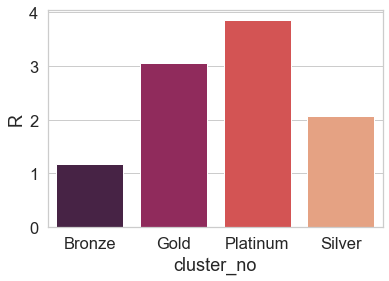

In [88]:
test = RFM_final_df

test = test.reset_index()
print(test)
test['R'] = test['R'].astype(int)
test['F'] = test['F'].astype(int)
test['M'] = test['M'].astype(int)
test.loc[test['cluster_no'] == 2, 'cluster_no'] = 'Platinum'
test.loc[test['cluster_no'] == 0, 'cluster_no'] = 'Gold'
test.loc[test['cluster_no'] == 1, 'cluster_no'] = 'Silver'
test.loc[test['cluster_no'] == 3, 'cluster_no'] = 'Bronze'
test = test.groupby('cluster_no')['R', 'F','M', 'sum_val'].mean().reset_index()
print(test)
#test.drop([0], inplace = True)
fig.set_size_inches(10, 16)
sns.barplot(data=test,x='cluster_no', y='R', palette='rocket', orient= True)

      CustomerID   Recency  Frequency   Monetary  R  F  M  sum_val  cluster_no
0          12346  5.786897   0.000000  11.253942  1  1  4        6           1
1          12347  0.693147   5.204007   8.368693  4  4  4       12           2
2          12348  4.317488   3.433987   7.494007  2  2  4        8           1
3          12349  2.944439   4.290459   7.471676  3  3  4       10           2
4          12350  5.736572   2.833213   5.812338  1  1  2        4           3
...          ...       ...        ...        ... .. .. ..      ...         ...
4333       18280  5.627621   2.302585   5.196285  1  1  1        3           3
4334       18281  5.198497   1.945910   4.392224  1  1  1        3           3
4335       18282  2.079442   2.484907   5.182064  4  1  1        6           1
4336       18283  1.386294   6.628041   7.647252  4  4  4       12           2
4337       18287  3.761200   4.248495   7.516041  3  3  4       10           0

[4338 rows x 9 columns]
  cluster_no         R     

<AxesSubplot:xlabel='cluster_no', ylabel='F'>

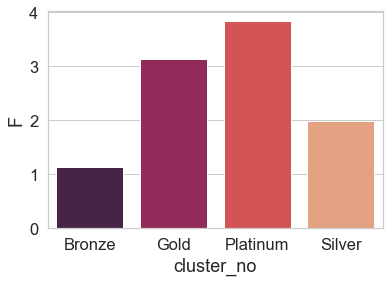

In [89]:
test = RFM_final_df

test = test.reset_index()
print(test)
test['R'] = test['R'].astype(int)
test['F'] = test['F'].astype(int)
test['M'] = test['M'].astype(int)
test.loc[test['cluster_no'] == 2, 'cluster_no'] = 'Platinum'
test.loc[test['cluster_no'] == 0, 'cluster_no'] = 'Gold'
test.loc[test['cluster_no'] == 1, 'cluster_no'] = 'Silver'
test.loc[test['cluster_no'] == 3, 'cluster_no'] = 'Bronze'
test = test.groupby('cluster_no')['R', 'F','M', 'sum_val'].mean().reset_index()
print(test)
#test.drop([0], inplace = True)
fig.set_size_inches(10, 16)
sns.barplot(data=test,x='cluster_no', y='F', palette='rocket', orient= True)

      CustomerID   Recency  Frequency   Monetary  R  F  M  sum_val  cluster_no
0          12346  5.786897   0.000000  11.253942  1  1  4        6           1
1          12347  0.693147   5.204007   8.368693  4  4  4       12           2
2          12348  4.317488   3.433987   7.494007  2  2  4        8           1
3          12349  2.944439   4.290459   7.471676  3  3  4       10           2
4          12350  5.736572   2.833213   5.812338  1  1  2        4           3
...          ...       ...        ...        ... .. .. ..      ...         ...
4333       18280  5.627621   2.302585   5.196285  1  1  1        3           3
4334       18281  5.198497   1.945910   4.392224  1  1  1        3           3
4335       18282  2.079442   2.484907   5.182064  4  1  1        6           1
4336       18283  1.386294   6.628041   7.647252  4  4  4       12           2
4337       18287  3.761200   4.248495   7.516041  3  3  4       10           0

[4338 rows x 9 columns]
  cluster_no         R     

<AxesSubplot:xlabel='cluster_no', ylabel='M'>

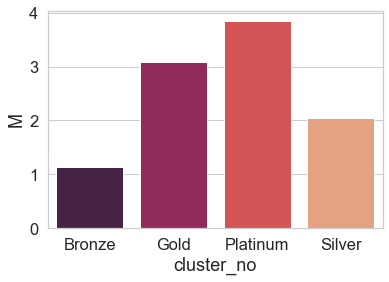

In [90]:
test = RFM_final_df

test = test.reset_index()
print(test)
test['R'] = test['R'].astype(int)
test['F'] = test['F'].astype(int)
test['M'] = test['M'].astype(int)
test.loc[test['cluster_no'] == 2, 'cluster_no'] = 'Platinum'
test.loc[test['cluster_no'] == 0, 'cluster_no'] = 'Gold'
test.loc[test['cluster_no'] == 1, 'cluster_no'] = 'Silver'
test.loc[test['cluster_no'] == 3, 'cluster_no'] = 'Bronze'
test = test.groupby('cluster_no')['R', 'F','M', 'sum_val'].mean().reset_index()
print(test)
#test.drop([0], inplace = True)
fig.set_size_inches(10, 16)
sns.barplot(data=test,x='cluster_no', y='M', palette='rocket', orient= True)